___
## Filtros da base de dados

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import zeros_like

In [4]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Leonardo\OneDrive\insper\dps 2018\ciencia dos dados\projeto 1


In [11]:
#Se usar o arquivo descompactado
#pd.read_csv('PES2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
dd2011=pd.read_csv('PES2015.csv',sep=',')


In [12]:
#Pegar as colunas
dadosID2011= dd2011.loc[: ,["V0302","V6007","V4743","V0404","V8005","V4742"]]

In [15]:

dadosID2011.V0302=dadosID2011.V0302.astype("category")
dadosID2011.V0302.cat.categories=(['Masculino','Feminino'])
dadosID2011.V6007=dadosID2011.V6007.astype("category")
dadosID2011.V6007.cat.categories=(['Elementar (primário)','Médio 1º ciclo (ginasial, etc.)','Médio 2º ciclo (científico, clássico, etc.)','Regular do ensino fundamental ou do 1º grau','Regular do ensino médio ou do 2º grau','Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau','Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau','Superior de graduação','Mestrado ou doutorado','Alfabetização de jovens e adultos','Creche','Classe de alfabetização - CA ','Maternal, jardim de infância etc.'])
dadosID2011.V4743=dadosID2011.V4743.astype("category")
dadosID2011.V4743.cat.categories=(['Sem rendimento','Até ¼ ','¼ até ½ ','De ½ até 1 ','De 1 até 2 ','De 2 até 3 ','De 3 até 5','Mais de 5','Sem declaração'])
dadosID2011.V0404=dadosID2011.V0404.astype("category")
dadosID2011.V0404.cat.categories=(['Indígena','Branca','Preta','Amarela','Parda','sem declaração'])
dadosID2011.V4742=dadosID2011.V4742.astype('float')

In [16]:
#filtragem por cor/raça
indio=dadosID2011.loc[(dadosID2011['V0404'] == 'Indígena')]
branca=dadosID2011.loc[(dadosID2011['V0404'] == 'Branca')]
negra=dadosID2011.loc[(dadosID2011['V0404'] == 'Preta')]
parda=dadosID2011.loc[(dadosID2011['V0404'] == 'Parda')]
amarela=dadosID2011.loc[(dadosID2011['V0404'] == 'Amarela')]

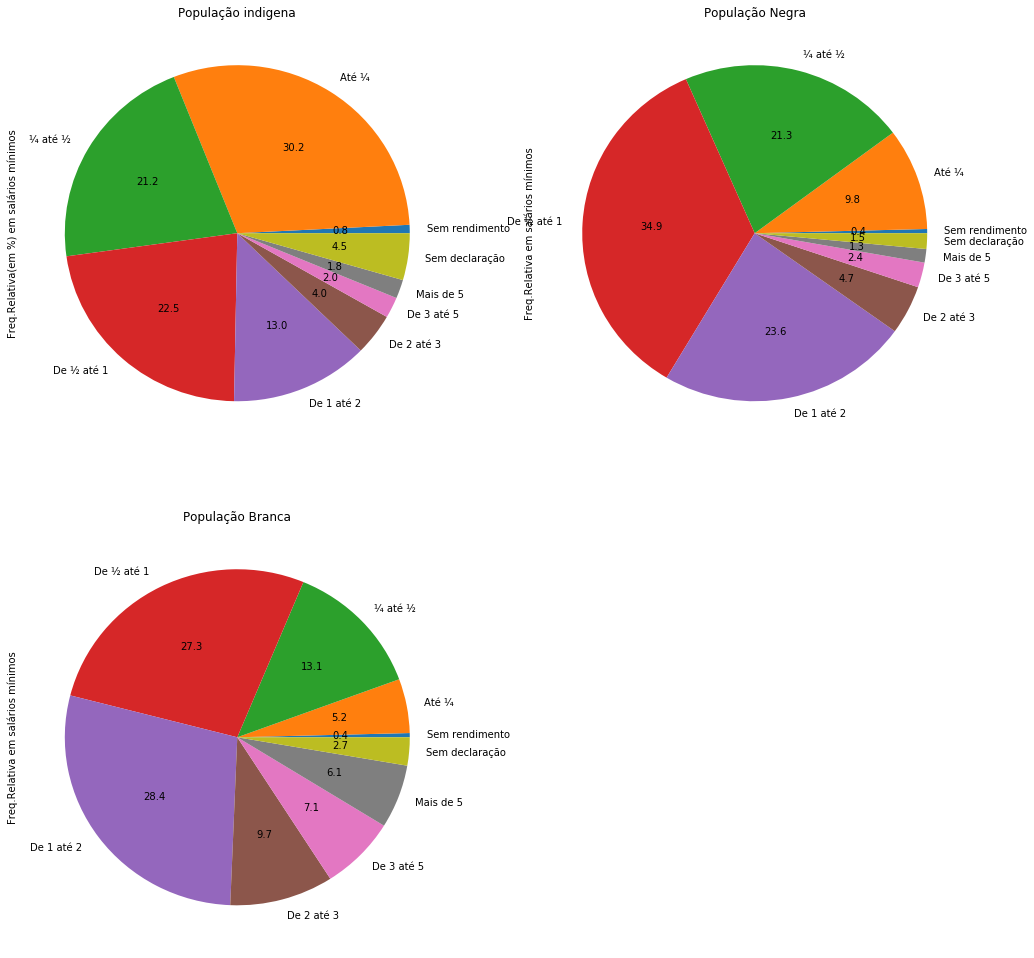

In [17]:
fig = plt.figure(figsize=(17, 17))

###########################################################################################################################
entrada = (indio.V4743.value_counts(sort=False, normalize=True)*100).round(decimals=1)

plt.subplot(221)
plot = entrada.plot(kind='pie',title='População indigena',autopct='%.1f')
plt.ylabel('Freq.Relativa(em %) em salários mínimos')
plt.xlabel('')

entrada2 = (negra.V4743.value_counts(sort=False, normalize=True)*100).round(decimals=1)

plt.subplot(222)
plot = entrada2.plot(kind='pie',title='População Negra',autopct='%.1f')
plt.ylabel('Freq.Relativa em salários mínimos')
plt.xlabel('')



entrada3 = (branca.V4743.value_counts(sort=False, normalize=True)*100).round(decimals=1)

plt.subplot(223)
plot = entrada3.plot(kind='pie',title='População Branca',autopct='%.1f')
plt.ylabel('Freq.Relativa em salários mínimos')


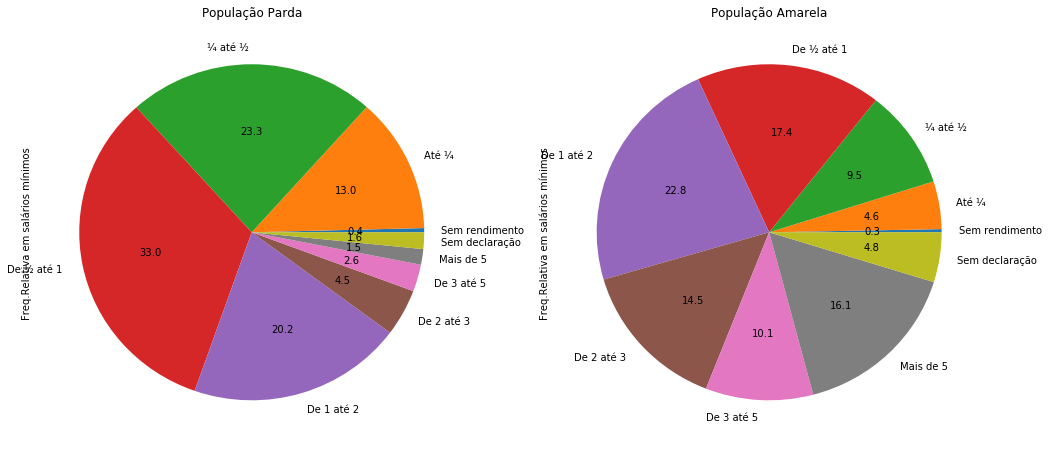

In [18]:
fig = plt.figure(figsize=(17, 17))

entrada4 = (parda.V4743.value_counts(sort=False, normalize=True)*100).round(decimals=1)

plt.subplot(221)
plot = entrada4.plot(kind='pie',title='População Parda',autopct='%.1f')
plt.ylabel('Freq.Relativa em salários mínimos')


entrada5 = (amarela.V4743.value_counts(sort=False, normalize=True)*100).round(decimals=1)

plt.subplot(222)
plot = entrada5.plot(kind='pie',title='População Amarela',autopct='%.1f')
plt.ylabel('Freq.Relativa em salários mínimos')



In [19]:
#filtragem por sexo
homens=dadosID2011.loc[(dadosID2011['V0302'] == 'Masculino')]
mulheres=dadosID2011.loc[(dadosID2011['V0302'] == 'Feminino')]

In [20]:
def converter(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)

In [21]:
cores1 = (dadosID2011.V0404.value_counts(sort=True, normalize=True)*100).round(decimals=1)
print(cores1,'\n')


Parda             48.1
Branca            41.7
Preta              9.3
Indígena           0.5
Amarela            0.4
sem declaração     0.0
Name: V0404, dtype: float64 



In [22]:
#Freq.relativa (%) por faixa salarial
salariocor = pd.crosstab([dadosID2011.V0404],dadosID2011.V4743)*(100/358919)
salariocor

V4743,Sem rendimento,Até ¼,¼ até ½,De ½ até 1,De 1 até 2,De 2 até 3,De 3 até 5,Mais de 5,Sem declaração
V0404,,,,,,,,,
Indígena,0.003622,0.137636,0.096679,0.102530,0.059345,0.018110,0.009194,0.008080,0.020617
Branca,0.181099,2.155640,5.422115,11.286669,11.716014,4.037680,2.953034,2.535391,1.133961
Preta,0.037056,0.906333,1.965346,3.211867,2.176814,0.431016,0.221498,0.122033,0.139307
Amarela,0.001114,0.017274,0.035941,0.065753,0.086370,0.054887,0.038170,0.060738,0.018110
Parda,0.168283,6.218116,11.152098,15.780441,9.645909,2.143102,1.227575,0.712974,0.756995
sem declaração,0.000000,0.000000,0.000000,0.000557,0.000000,0.000000,0.000000,0.000000,0.000557


In [51]:
#o valor do step foi definido com base no salario minimo de 2011
faixa = range(100,6000,271)
renda=dadosID2011.V4742[(dadosID2011.V4742 >= 0) & (dadosID2011.V4742 <= 99999999)]
renda.describe()

count    348884.000000
mean       1041.816784
std        1597.518200
min           0.000000
25%         356.000000
50%         650.000000
75%        1133.000000
max      150000.000000
Name: V4742, dtype: float64

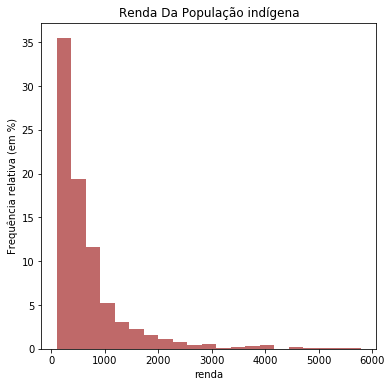

count     1562.000000
mean       687.624200
std       1938.666171
min          0.000000
25%        157.000000
50%        343.500000
75%        714.250000
max      60000.000000
Name: V4742, dtype: float64


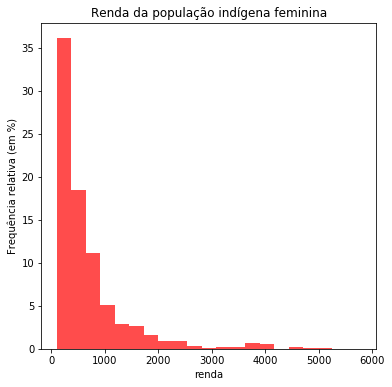

count      784.000000
mean       762.443878
std       2523.805545
min          0.000000
25%        160.000000
50%        333.000000
75%        732.250000
max      60000.000000
Name: V4742, dtype: float64


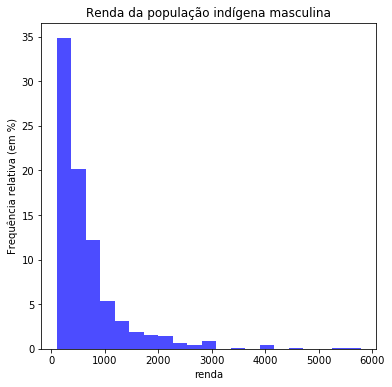

count      778.000000
mean       612.227506
std       1058.580115
min          0.000000
25%        145.000000
50%        355.000000
75%        711.500000
max      19500.000000
Name: V4742, dtype: float64


In [52]:
renda_indios=renda.loc[(dadosID2011['V0404'] == 'Indígena')]
plot = renda_indios.plot.hist(bins=faixa,title='Renda Da População indígena', weights=zeros_like(renda_indios)+1./renda_indios.size*100, figsize=(6, 6), alpha=0.7,color=("Brown"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_indios.describe())
media_indio=renda_indios.mean()
renda_indias=renda_indios.loc[(indio['V0302'] == 'Feminino')]
plot2 = renda_indias.plot.hist(bins=faixa,title='Renda da população indígena feminina', weights=zeros_like(renda_indias)+1./renda_indias.size*100, figsize=(6, 6), alpha=0.7,color=("Red"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_indias.describe())

renda_indios_homens=renda_indios.loc[(indio['V0302'] == 'Masculino')]
plot3 = renda_indios_homens.plot.hist(bins=faixa,title='Renda da população indígena masculina', weights=zeros_like(renda_indios_homens)+1./renda_indios_homens.size*100, figsize=(6, 6), alpha=0.7,color=("Blue"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_indios_homens.describe())

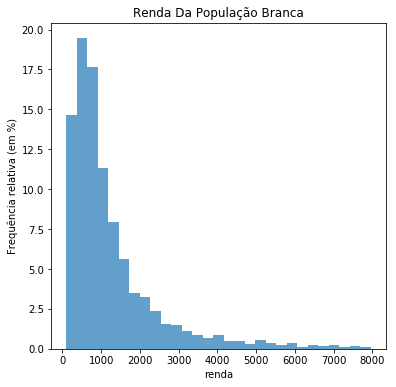

count    144600.000000
mean       1410.235982
std        2088.734628
min           0.000000
25%         481.000000
50%         833.000000
75%        1520.000000
max      150000.000000
Name: V4742, dtype: float64


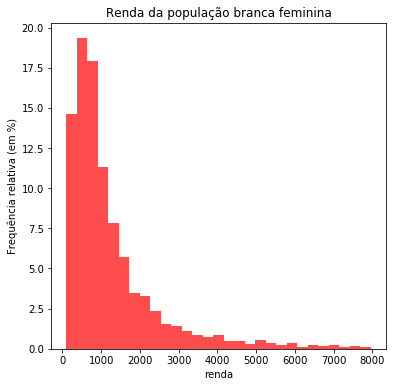

count     76425.000000
mean       1398.020111
std        1985.571033
min           0.000000
25%         480.000000
50%         833.000000
75%        1525.000000
max      107000.000000
Name: V4742, dtype: float64


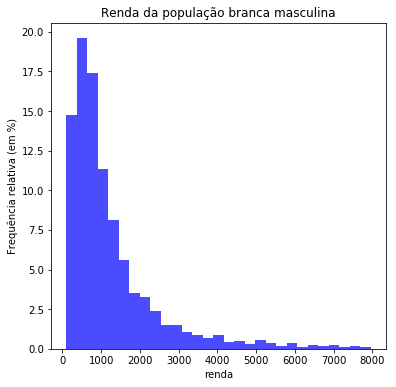

count     68175.000000
mean       1423.930121
std        2198.569102
min           0.000000
25%         482.000000
50%         836.000000
75%        1507.000000
max      150000.000000
Name: V4742, dtype: float64


In [53]:
faixa = range(100,8000,271)
renda_brancos=renda.loc[(dadosID2011['V0404'] == 'Branca')]
plot = renda_brancos.plot.hist(bins=faixa,title='Renda Da População Branca', weights=zeros_like(renda_brancos)+1./renda_brancos.size*100, figsize=(6, 6), alpha=0.7)
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_brancos.describe())
media_branco=renda_brancos.mean()
renda_brancas=renda_brancos.loc[(branca['V0302'] == 'Feminino')]
plot2 = renda_brancas.plot.hist(bins=faixa,title='Renda da população branca feminina', weights=zeros_like(renda_brancas)+1./renda_brancas.size*100, figsize=(6, 6), alpha=0.7,color=("Red"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_brancas.describe())

renda_brancos_homens=renda_brancos.loc[(branca['V0302'] == 'Masculino')]
plot3 = renda_brancos_homens.plot.hist(bins=faixa,title='Renda da população branca masculina', weights=zeros_like(renda_brancos_homens)+1./renda_brancos_homens.size*100, figsize=(6, 6), alpha=0.7,color=("Blue"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_brancos_homens.describe())

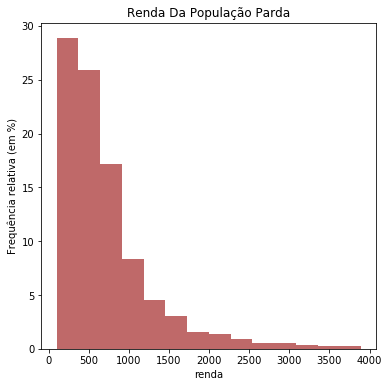

count    168866.000000
mean        769.330066
std        1035.009552
min           0.000000
25%         293.000000
50%         525.000000
75%         875.000000
max       45000.000000
Name: V4742, dtype: float64


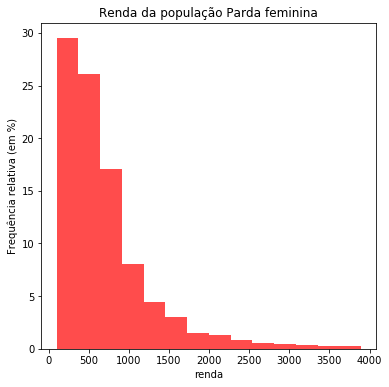

count    85354.000000
mean       750.968332
std        981.551144
min          0.000000
25%        286.000000
50%        514.000000
75%        850.000000
max      34900.000000
Name: V4742, dtype: float64


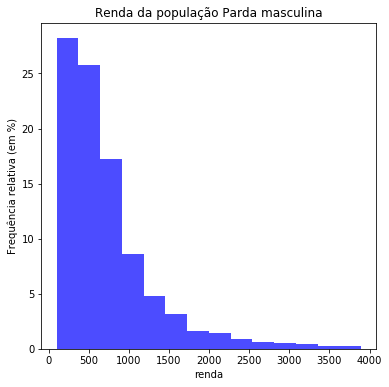

count    83512.000000
mean       788.096800
std       1086.618942
min          0.000000
25%        300.000000
50%        527.000000
75%        900.000000
max      45000.000000
Name: V4742, dtype: float64


In [54]:
faixa = range(100,4000,271)
renda_pardos=renda.loc[(dadosID2011['V0404'] == 'Parda')]
plot = renda_pardos.plot.hist(bins=faixa,title='Renda Da População Parda', weights=zeros_like(renda_pardos)+1./renda_pardos.size*100, figsize=(6, 6), alpha=0.7,color=("Brown"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_pardos.describe())
media_parda=renda_pardos.mean()
renda_pardas=renda_pardos.loc[(parda['V0302'] == 'Feminino')]
plot2 = renda_pardas.plot.hist(bins=faixa,title='Renda da população Parda feminina', weights=zeros_like(renda_pardas)+1./renda_pardas.size*100, figsize=(6, 6), alpha=0.7,color=("Red"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_pardas.describe())

renda_pardos_homens=renda_pardos.loc[(parda['V0302'] == 'Masculino')]
plot3 = renda_pardos_homens.plot.hist(bins=faixa,title='Renda da população Parda masculina', weights=zeros_like(renda_pardos_homens)+1./renda_pardos_homens.size*100, figsize=(6, 6), alpha=0.7,color=("Blue"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_pardos_homens.describe())

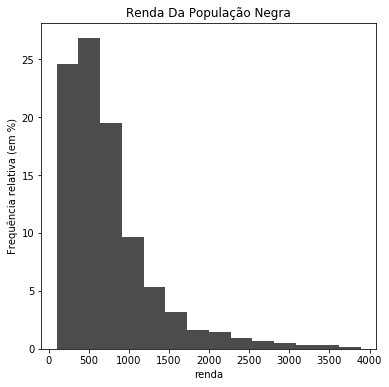

count    32561.000000
mean       789.923559
std        918.997210
min          0.000000
25%        333.000000
50%        580.000000
75%        925.000000
max      28000.000000
Name: V4742, dtype: float64


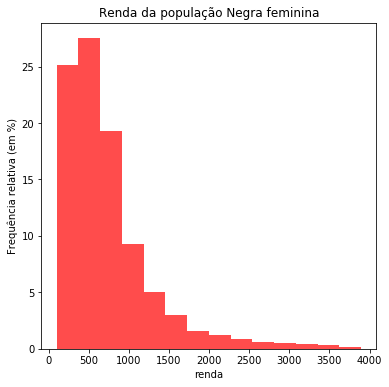

count    16310.000000
mean       765.657082
std        848.350105
min          0.000000
25%        325.000000
50%        562.000000
75%        900.000000
max      19003.000000
Name: V4742, dtype: float64


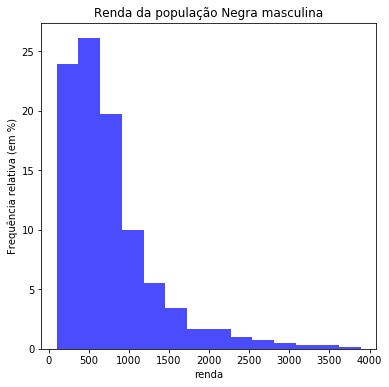

count    16251.000000
mean       814.278137
std        984.243328
min          0.000000
25%        338.000000
50%        599.000000
75%        950.000000
max      28000.000000
Name: V4742, dtype: float64


In [55]:
faixa = range(100,4000,271)
renda_negros=renda.loc[(dadosID2011['V0404'] == 'Preta')]
plot = renda_negros.plot.hist(bins=faixa,title='Renda Da População Negra', weights=zeros_like(renda_negros)+1./renda_negros.size*100, figsize=(6, 6), alpha=0.7,color=("Black"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_negros.describe())
media_preta=renda_negros.mean()
renda_negras=renda_negros.loc[(negra['V0302'] == 'Feminino')]
plot2 = renda_negras.plot.hist(bins=faixa,title='Renda da população Negra feminina', weights=zeros_like(renda_negras)+1./renda_negras.size*100, figsize=(6, 6), alpha=0.7,color=("Red"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_negras.describe())

renda_negros_homens=renda_negros.loc[(negra['V0302'] == 'Masculino')]
plot3 = renda_negros_homens.plot.hist(bins=faixa,title='Renda da população Negra masculina', weights=zeros_like(renda_negros_homens)+1./renda_negros_homens.size*100, figsize=(6, 6), alpha=0.7,color=("Blue"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_negros_homens.describe())

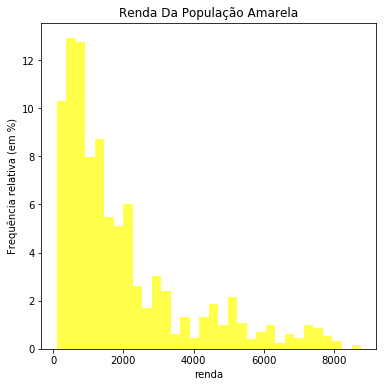

count     1293.000000
mean      2198.921114
std       2653.017109
min          0.000000
25%        608.000000
50%       1262.000000
75%       2666.000000
max      27000.000000
Name: V4742, dtype: float64


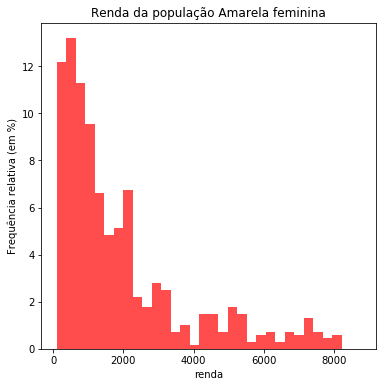

count      682.000000
mean      2132.910557
std       2617.690599
min          0.000000
25%        521.250000
50%       1200.000000
75%       2524.750000
max      27000.000000
Name: V4742, dtype: float64


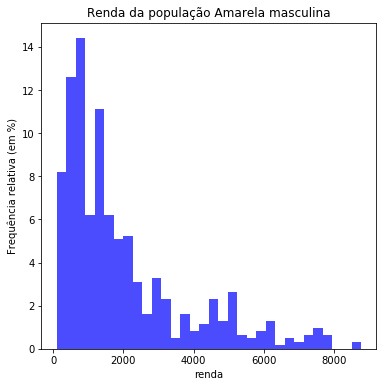

count      611.000000
mean      2272.602291
std       2692.136039
min          0.000000
25%        723.000000
50%       1366.000000
75%       2854.000000
max      27000.000000
Name: V4742, dtype: float64


In [56]:
faixa = range(100,9000,271)
renda_amarelos=renda.loc[(dadosID2011['V0404'] == 'Amarela')]
plot = renda_amarelos.plot.hist(bins=faixa,title='Renda Da População Amarela', weights=zeros_like(renda_amarelos)+1./renda_amarelos.size*100, figsize=(6, 6), alpha=0.7,color=("Yellow"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_amarelos.describe())
media_amarela=renda_amarelos.mean()
renda_amarelas=renda_amarelos.loc[(amarela['V0302'] == 'Feminino')]
plot2 = renda_amarelas.plot.hist(bins=faixa,title='Renda da população Amarela feminina', weights=zeros_like(renda_amarelas)+1./renda_amarelas.size*100, figsize=(6, 6), alpha=0.7,color=("Red"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_amarelas.describe())

renda_amarelos_homens=renda_amarelos.loc[(amarela['V0302'] == 'Masculino')]
plot3 = renda_amarelos_homens.plot.hist(bins=faixa,title='Renda da população Amarela masculina', weights=zeros_like(renda_amarelos_homens)+1./renda_amarelos_homens.size*100, figsize=(6, 6), alpha=0.7,color=("Blue"))
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('renda')
plt.show()
print(renda_amarelos_homens.describe())

In [57]:
print(media_amarela)
print(media_preta)
print(media_branco)
print(media_indio)
print(media_parda)

2198.921113689095
789.9235588587574
1410.2359820193637
687.6241997439181
769.3300664432153


___
## Conclusão 

Apos analisar os salários das diferentes etinas no Brasil ,pude comprovar que a diferença salarial étnico-racial é muitas vezes maior do que a diferença salarial entre os sexos.Para surpresa,apos analisar diferença salarial entre os sexos das diferentes etnias na pnad de 2011 , descobri que a maior diferença salarial relativa ao salario médio de genero se encontrava no grupo dos indígenas, de 8,5% e quem apresentava a maior media salarial eram as mulheres.Na pnad de 2015 pude observar que a diferença salarial entre os indígenas aumentou muito , foi de 8,5% para 24,5%.As mulheres indígenas ganhavam um salario médio de 762 reais enquanto os homens ganhavam 612 reais.
O único grupo étnico-racial em que as mulheres ganham em media mais do que os homens e que apresenta a maior diferenca salarial é o indígena.Mas quando analisamos a diferença salarial entre as diferentes cores/raça da população ,podemos notar pela pnad de 2011 que a população que se considera amarela, recebia em media 1127 reais ,segue pela branca 993 reais ,indígena 556 reais  ,negra 557 reais e por ultimo a parda, ganhando em media 541 reais .Podemos observar que a diferença salarial étnico-racial em 2011 é mais de 10 vezés maior do que a diferença salarial entre os generos quando comparamos os salários médios da população amarela com a da população negra, e os salários médios dos homens e mulheres indígenas tendo em media 586 reais de diferença salarial.
Pela pnad de 2015 , podemos observar que a diferença salarial étnico-racial aumentou muito, os amarelos ganhando em media 2190 reais enquanto a populações brancas,negras ,pardas e indígenas, ganhavam respectivamente 1410 reais , 789 reais ,769 reais e 687 reais. Onde a maior diferença salarial se encontra entre os amarelos e os indígenas , 1503 reais , aproximadamente 300% da diferença encontrada na pnad de 2011.